**1. Import Libraries**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.preprocessing import image
import cv2

**2. Load Dataset**

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3. Visualize a Sample Image**

5


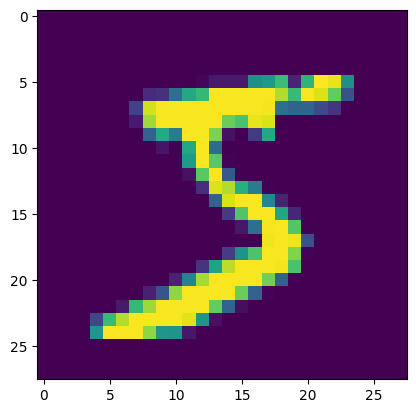

In [3]:
plt.imshow(x_train[0])
print(y_train[0])

**4. Reshape Dataset (Add Channel Dimension)**

In [4]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

**5. Normalize Pixel Values**

In [5]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
print(y_train[0])

5


**6. One-Hot Encode Labels**

In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**7. Build CNN Model**

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**8. Compile the Model**

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,482 (240.16 KB)

 Trainable params: 61,482 (240.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

**9. Train the Model**

In [19]:
model.fit(x_train,y_train, batch_size=1024, epochs=10, verbose=1)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 46s 772ms/step - accuracy: 0.9884 - loss: 0.0379
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 34s 571ms/step - accuracy: 0.9900 - loss: 0.0338
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - accuracy: 0.9902 - loss: 0.0323
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 46s 642ms/step - accuracy: 0.9912 - loss: 0.0293
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 37s 571ms/step - accuracy: 0.9915 - loss: 0.0274
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 581ms/step - accuracy: 0.9927 - loss: 0.0253
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 744ms/step - accuracy: 0.9921 - loss: 0.0236
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 75s 622ms/step - accuracy: 0.9939 - loss: 0.0218
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 580ms/step - accuracy: 0.9936 - loss: 0.0218
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 570ms/step - accuracy: 0.9946 - loss: 0.0189


**10. Single Image Prediction**

In [14]:
pred = model.predict(x_test[1].reshape(1,28,28,1))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[3.2683682e-05, 1.6185683e-04, 9.9979931e-01, 1.3255334e-06,
        7.8373263e-09, 6.6226690e-08, 1.7158943e-06, 1.2596721e-08,
        3.0834860e-06, 7.9469820e-10]], dtype=float32)

In [15]:
prediction = pred.argmax(axis=1)
prediction

array([2])

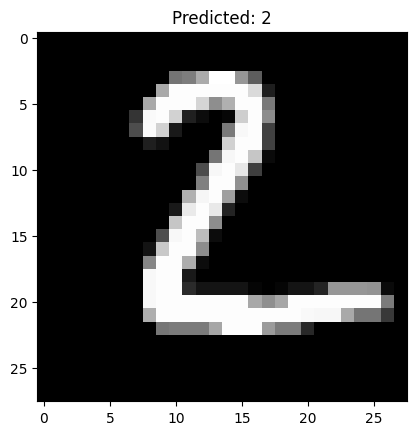

In [16]:
plt.imshow((x_test[1]*255).reshape(28,28).astype("uint8"), cmap="gray")
plt.title(f"Predicted: {prediction[0]}")
plt.show()


**11. Random Predictions (Multiple Images)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


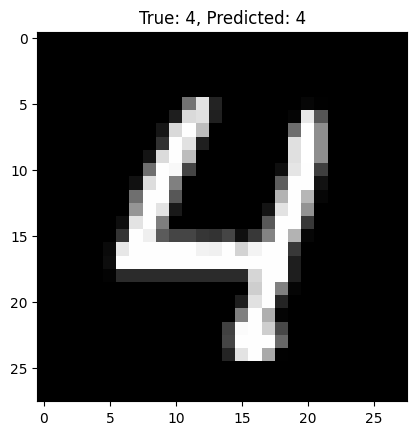

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


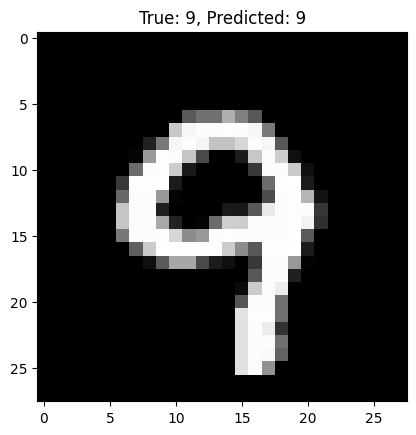

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


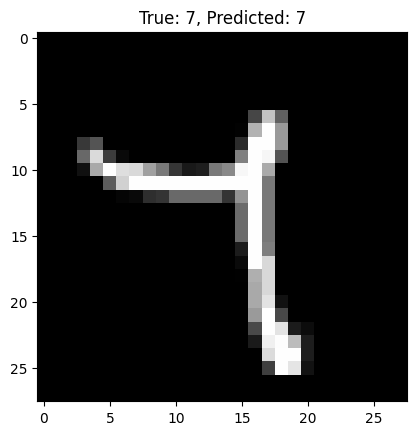

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


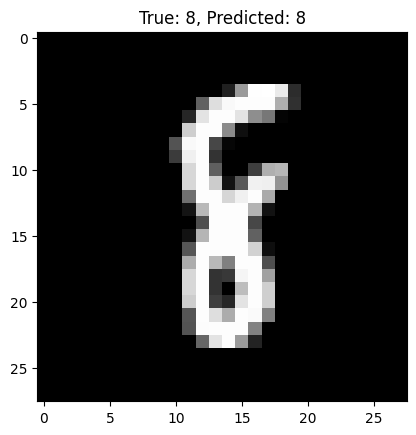

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


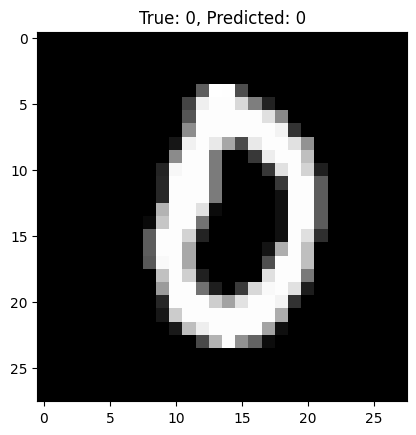

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


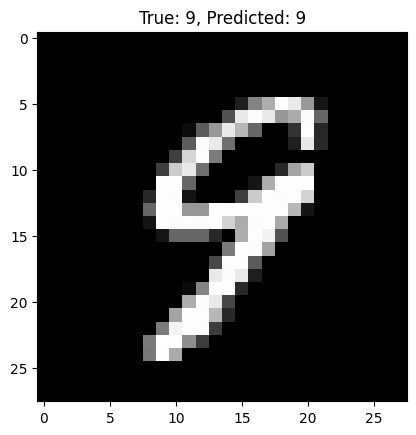

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


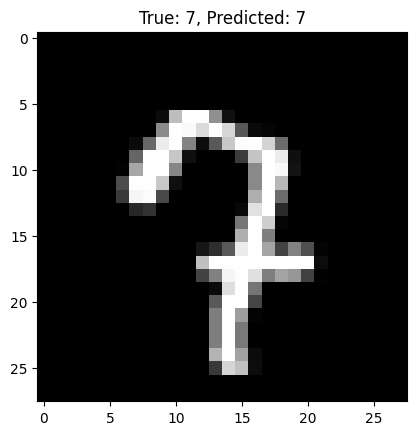

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


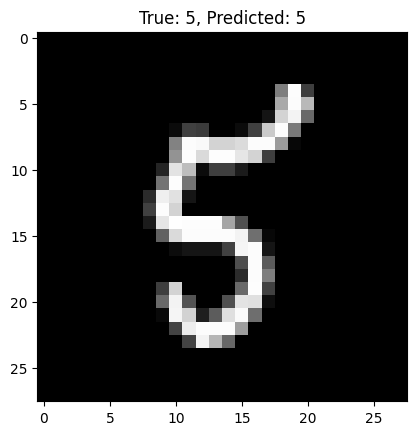

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


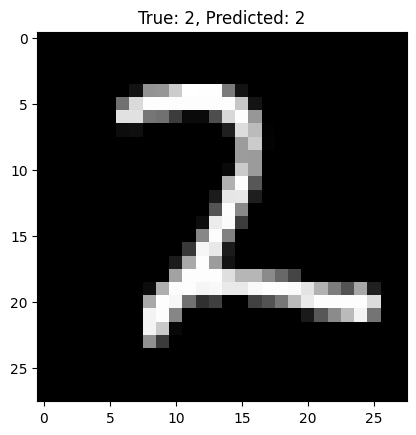

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


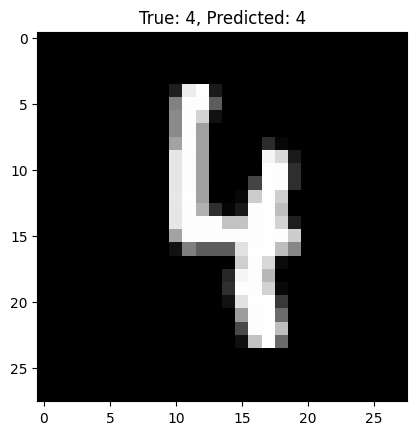

In [17]:
for i in np.random.choice(np.arange(0, len(y_test)), size=10):
    pred = model.predict(x_test[i].reshape(1,28,28,1))
    prediction = pred.argmax(axis=1)

    plt.imshow((x_test[i] * 255).reshape((28,28)).astype("uint8"), cmap="gray")
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {prediction[0]}")
    plt.show()


**12. Loading and predicting image**

In [32]:
img = cv2.imread("/content/drive/MyDrive/MNIST-Project-CNN/testing_images/one.png", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28,28))
img = img.astype("float32") / 255.0
img = img.reshape(1,28,28,1)

pred = model.predict(img)
prediction = pred.argmax(axis=1)
print("Predicted Digit:", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Digit: 1
